# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
from random import sample

from IPython.core.pylabtools import figsize
!pip install opencv-contrib-python



In [2]:
!pip install mediapipe

In [2]:
import math
import cv2
import numpy as np
from time import time
import os
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode= True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils
# mp_solution pose is use for detect 33 landmark on body

I0000 00:00:1732694023.507783  967193 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2


Error: File 'sample.image' does not exist in the project directory.
Error: Unable to load the image file 'sample.image'. Make sure it is a valid image format.


[ WARN:0@3.290] global loadsave.cpp:241 findDecoder imread_('sample.image'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

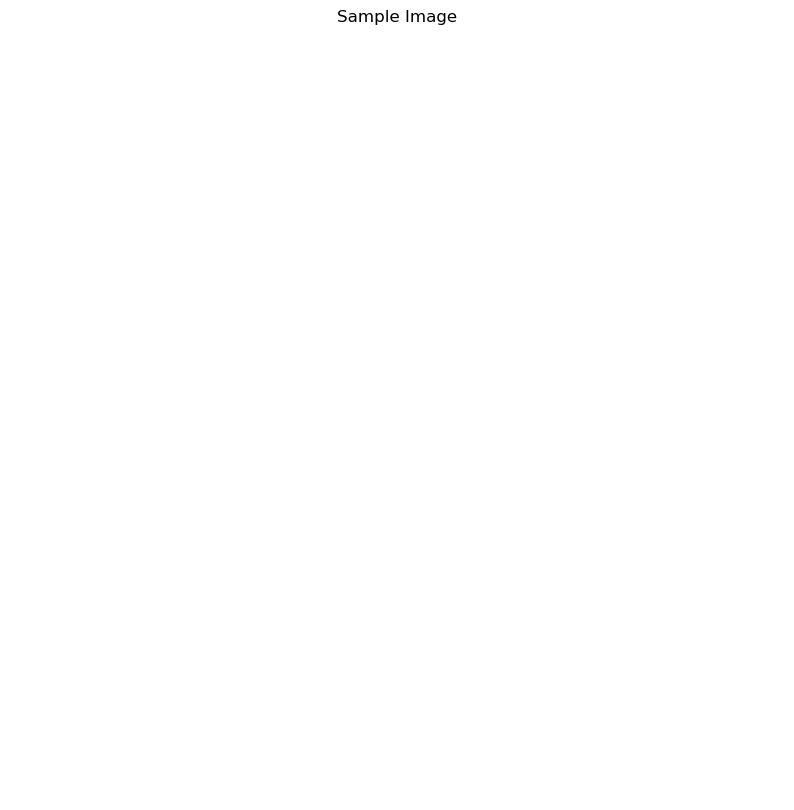

In [4]:


image_path = 'sample.image'


if not os.path.exists(image_path):
    print(f"Error: File '{image_path}' does not exist in the project directory.")
    exit()

sample_img = cv2.imread(image_path)


if sample_img is None:
    print(f"Error: Unable to load the image file '{image_path}'. Make sure it is a valid image format.")
    exit()


plt.figure(figsize=(10, 10))
plt.title("Sample Image")
plt.axis('off')
plt.imshow(sample_img[..., ::-1])
plt.show()


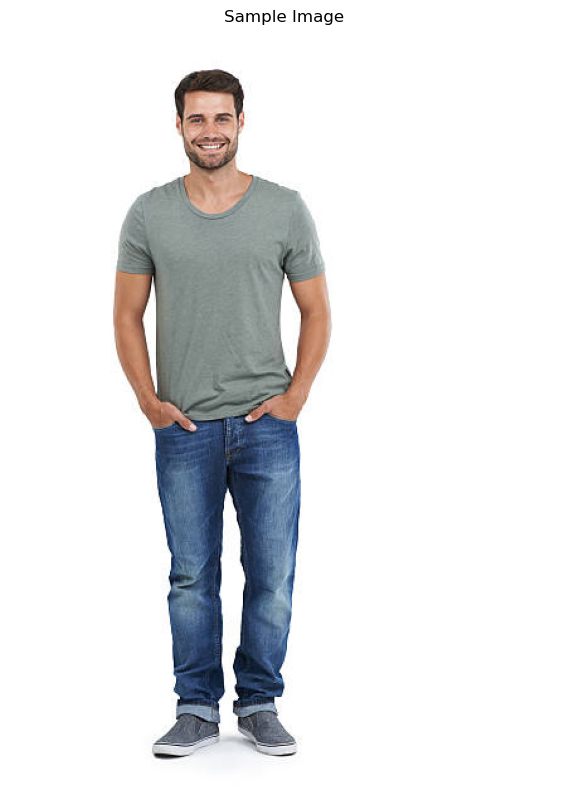

In [1]:

import cv2
import matplotlib.pyplot as plt
import os


image_path = os.path.join(os.getcwd(), "sample.image.jpg")


if not os.path.exists(image_path):
    print(f"Error: File '{image_path}' does not exist in the current directory '{os.getcwd()}'.")
    exit()


sample_img = cv2.imread(image_path)


if sample_img is None:
    print(f"Error: Unable to load the image file '{image_path}'. Ensure it is a valid image format and not corrupted.")
    exit()


plt.figure(figsize=(10, 10))
plt.title("Sample Image")
plt.axis('off')
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.show()


In [10]:
import mediapipe as mp
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.pose_landmarks:
    for i in range(2):
        landmark = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]
        print(f"{mp_pose.PoseLandmark(i).name}:\n{landmark}")


NOSE:
x: 0.36772429943084717
y: 0.12793172895908356
z: -0.7614436745643616
visibility: 0.9999933242797852

LEFT_EYE_INNER:
x: 0.3839305341243744
y: 0.11034506559371948
z: -0.720958948135376
visibility: 0.9999779462814331



I0000 00:00:1732202300.556250 2733983 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1732202300.653862 2750036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732202300.676188 2750036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732202300.707421 2750030 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [11]:

image_height, image_width, _ = sample_img.shape


if results.pose_landmarks:
    for i in range(2):

        landmark = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]


        print(f"{mp_pose.PoseLandmark(i).name}:")
        print(f"  x: {landmark.x * image_width}")
        print(f"  y: {landmark.y * image_height}")
        print(f"  z: {landmark.z * image_width}")
        print(f"  visibility: {landmark.visibility}\n")


NOSE:
  x: 160.32779455184937
  y: 78.29421812295914
  z: -331.98944211006165
  visibility: 0.9999933242797852

LEFT_EYE_INNER:
  x: 167.39371287822723
  y: 67.53118014335632
  z: -314.3381013870239
  visibility: 0.9999779462814331



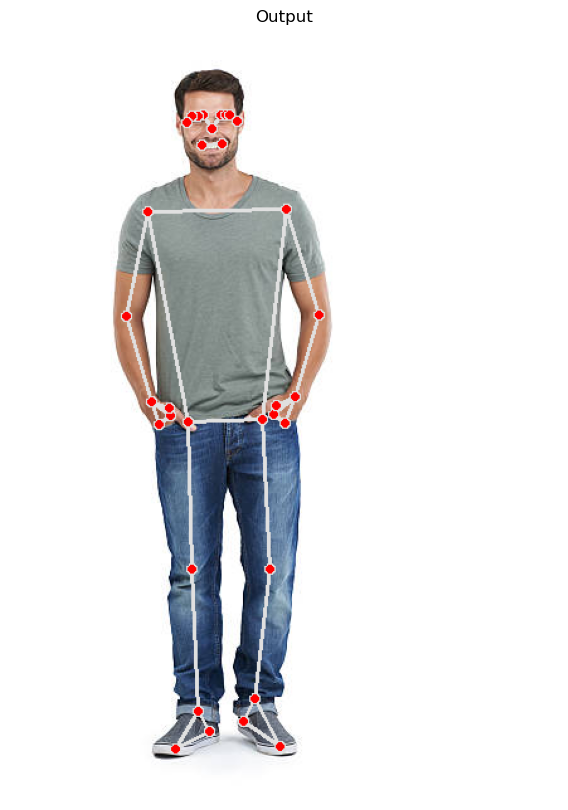

In [12]:

img_copy = sample_img.copy()


if results.pose_landmarks:

    mp.solutions.drawing_utils.draw_landmarks(
        image=img_copy,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS
    )


fig = plt.figure(figsize=[10, 10])


plt.title("Output")
plt.axis('off')
plt.imshow(img_copy[:, :, ::-1])
plt.show()


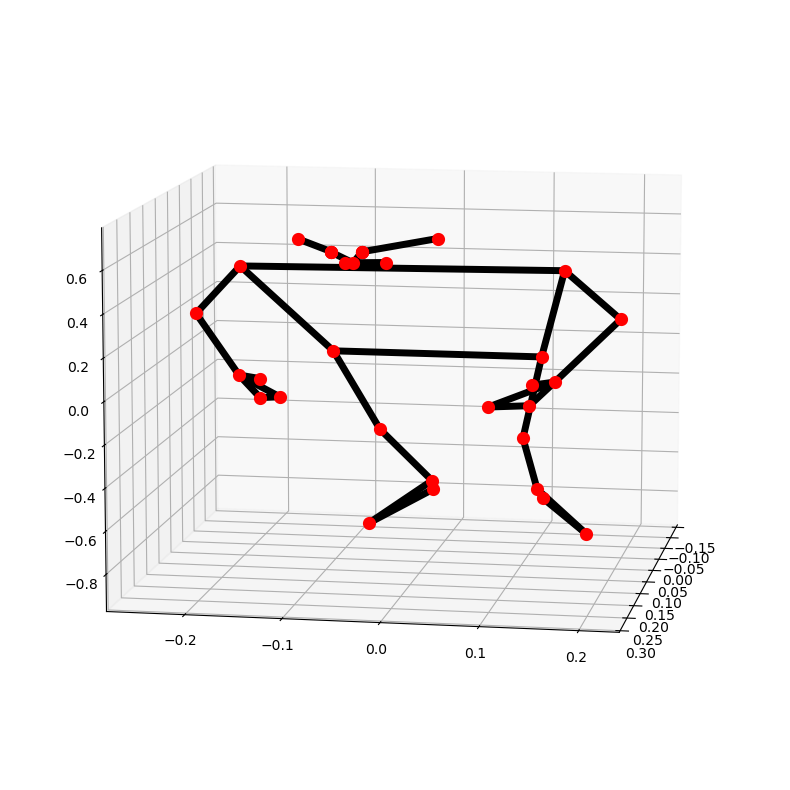

In [14]:
import mediapipe as mp


mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


mp_drawing.plot_landmarks(
    results.pose_world_landmarks,
    mp_pose.POSE_CONNECTIONS
)


In [19]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt


mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

def detect_pose(image, draw_landmarks=True, display_results=True):
    """
    Detects pose landmarks in an image using Mediapipe and visualizes or returns the results.

    Args:
        image (numpy array): The input image (BGR format).
        draw_landmarks (bool): Whether to draw pose landmarks on the image.
        display_results (bool): Whether to display the results using matplotlib.

    Returns:
        dict: A dictionary containing pose landmarks and image with landmarks (if applicable).
    """

    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:

        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        results = pose.process(rgb_image)


        image_with_landmarks = image.copy()

        if results.pose_landmarks and draw_landmarks:

            mp_drawing.draw_landmarks(
                image=image_with_landmarks,
                landmark_list=results.pose_landmarks,
                connections=mp_pose.POSE_CONNECTIONS
            )


        if display_results and draw_landmarks:
            plt.figure(figsize=[10, 10])
            plt.title("Pose Detection Result")
            plt.axis('off')
            plt.imshow(cv2.cvtColor(image_with_landmarks, cv2.COLOR_BGR2RGB))
            plt.show()


        return {
            "pose_landmarks": results.pose_landmarks,
            "pose_world_landmarks": results.pose_world_landmarks,
            "image_with_landmarks": image_with_landmarks if draw_landmarks else None
        }


In [27]:
import cv2
import mediapipe as mp


mp_pose = mp.solutions.pose
pose = mp_pose.Pose()


mp_drawing = mp.solutions.drawing_utils


cap = cv2.VideoCapture(0)


if not cap.isOpened():
    raise IOError("Cannot open webcam")


def detectPose(frame, pose, display=True):

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


    results = pose.process(frame_rgb)

    if display:

        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)


    return frame, results.pose_landmarks

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture image")
        break


    frame_with_landmarks, pose_landmarks = detectPose(frame, pose, display=True)


    cv2.imshow('Pose Detection', frame_with_landmarks)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


I0000 00:00:1732204464.435585 2733983 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1732204464.541409 2785503 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732204464.568755 2785503 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [6]:
import cv2
import mediapipe as mp

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

mp_drawing = mp.solutions.drawing_utils


landmark_style = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=5)  # Green landmarks
connection_style = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=4)  # Green connections


cap = cv2.VideoCapture(0)


if not cap.isOpened():
    raise IOError("Cannot open webcam")


def detect_full_body_pose(frame, pose, display=True):

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


    results = pose.process(frame_rgb)

    if display:

        mp_drawing.draw_landmarks(
            frame,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=landmark_style,
            connection_drawing_spec=connection_style
        )


    return frame, results.pose_landmarks


while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture image")
        break


    frame_with_landmarks, pose_landmarks = detect_full_body_pose(frame, pose, display=True)


    cv2.imshow('Full Body Pose Detection', frame_with_landmarks)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


I0000 00:00:1732207579.941269 2831162 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1732207580.052335 2837603 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732207580.097310 2837603 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


I0000 00:00:1732205055.053041 2733983 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1732205055.219552 2794504 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732205055.261891 2794510 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Error: name 'detect_full_body_pose' is not defined


In [1]:
import math

def calculateAngle(landmark1, landmark2, landmark3):
    """
    This function calculates the angle between three different landmarks.

    Args:
    landmark1: The first landmark containing the x, y, and z coordinates.
    landmark2: The second landmark containing the x, y, and z coordinates.
    landmark3: The third landmark containing the x, y, and z coordinates.

    Returns:
    angle: The calculated angle between the three landmarks.
    """

    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3


    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))

    .
    if angle < 0:

        angle += 360


    return angle


In [2]:


angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))


print(f'The calculated angle is {angle} degrees.')


The calculated angle is 166.26373169437744 degrees.


In [2]:
import math
import cv2
import mediapipe as mp


mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils


def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))


    if angle < 0:
        angle += 360
    return angle


def classifyCardioPose(landmarks):

    shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]
    wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST]
    hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE]
    ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE]
    hip_right = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]
    knee_right = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE]


    elbow_angle = calculateAngle((shoulder.x, shoulder.y, 0), (elbow.x, elbow.y, 0), (wrist.x, wrist.y, 0))
    knee_angle = calculateAngle((hip.x, hip.y, 0), (knee.x, knee.y, 0), (ankle.x, ankle.y, 0))
    knee_right_angle = calculateAngle((hip_right.x, hip_right.y, 0), (knee_right.x, knee_right.y, 0), (ankle.x, ankle.y, 0))


    if elbow_angle > 160 and knee_angle > 160:
        return "Jumping Jacks"
    elif knee_angle < 90 and elbow_angle < 90:
        return "Squat"
    elif knee_right_angle > 160:
        return "High Knees"
    else:
        return "Unknown Pose"


def draw_landmarks_with_visuals(frame, landmarks):

    for connection in mp_pose.POSE_CONNECTIONS:
        start_idx, end_idx = connection
        start = landmarks[start_idx]
        end = landmarks[end_idx]
        cv2.line(frame, (int(start.x * frame.shape[1]), int(start.y * frame.shape[0])),
                 (int(end.x * frame.shape[1]), int(end.y * frame.shape[0])), (0, 255, 0), 5)


    for idx in [mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_KNEE,
                mp_pose.PoseLandmark.LEFT_ANKLE, mp_pose.PoseLandmark.RIGHT_SHOULDER,
                mp_pose.PoseLandmark.RIGHT_KNEE, mp_pose.PoseLandmark.RIGHT_ANKLE]:
        joint = landmarks[idx]
        cv2.ellipse(frame, (int(joint.x * frame.shape[1]), int(joint.y * frame.shape[0])),
                    (10, 10), 0, 0, 360, (0, 0, 255), -1)
    return frame


cap = cv2.VideoCapture(0)  # its for web cam

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break


    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)


    if results.pose_landmarks:

        frame = draw_landmarks_with_visuals(frame, results.pose_landmarks.landmark)


        pose_name = classifyCardioPose(results.pose_landmarks.landmark)


        cv2.putText(frame, f'Pose: {pose_name}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


    cv2.imshow("Cardio Pose Classification", frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1732684467.366501  899896 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1732684467.473274  923041 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732684467.491842  923044 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


NameError: name 'exercise_count' is not defined

In [2]:
import math
import cv2
import mediapipe as mp

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

exercise_count = {
    "Jumping Jacks": 0,
    "Squat": 0,
    "High Knees": 0
}

def calculateAngle(landmark1, landmark2, landmark3):
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    if angle < 0:
        angle += 360
    return angle

def classifyCardioPose(landmarks):
    shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    elbow = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]
    wrist = landmarks[mp_pose.PoseLandmark.LEFT_WRIST]
    hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE]
    ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE]
    hip_right = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]
    knee_right = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE]
    elbow_angle = calculateAngle((shoulder.x, shoulder.y, 0), (elbow.x, elbow.y, 0), (wrist.x, wrist.y, 0))
    knee_angle = calculateAngle((hip.x, hip.y, 0), (knee.x, knee.y, 0), (ankle.x, ankle.y, 0))
    knee_right_angle = calculateAngle((hip_right.x, hip_right.y, 0), (knee_right.x, knee_right.y, 0), (ankle.x, ankle.y, 0))
    if elbow_angle > 160 and knee_angle > 160:
        return "Jumping Jacks"
    elif knee_angle < 90 and elbow_angle < 90:
        return "Squat"
    elif knee_right_angle > 160:
        return "High Knees"
    else:
        return "Unknown Pose"

def draw_landmarks_with_visuals(frame, landmarks):
    for connection in mp_pose.POSE_CONNECTIONS:
        start_idx, end_idx = connection
        start = landmarks[start_idx]
        end = landmarks[end_idx]
        cv2.line(frame, (int(start.x * frame.shape[1]), int(start.y * frame.shape[0])),
                 (int(end.x * frame.shape[1]), int(end.y * frame.shape[0])), (0, 255, 0), 5)
    for idx in [mp_pose.PoseLandmark.LEFT_SHOULDER, mp_pose.PoseLandmark.LEFT_KNEE,
                mp_pose.PoseLandmark.LEFT_ANKLE, mp_pose.PoseLandmark.RIGHT_SHOULDER,
                mp_pose.PoseLandmark.RIGHT_KNEE, mp_pose.PoseLandmark.RIGHT_ANKLE]:
        joint = landmarks[idx]
        cv2.ellipse(frame, (int(joint.x * frame.shape[1]), int(joint.y * frame.shape[0])),
                    (10, 10), 0, 0, 360, (0, 0, 255), -1)
    return frame

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)
    if results.pose_landmarks:
        frame = draw_landmarks_with_visuals(frame, results.pose_landmarks.landmark)
        pose_name = classifyCardioPose(results.pose_landmarks.landmark)
        if pose_name in exercise_count:
            exercise_count[pose_name] += 1
        cv2.putText(frame, f'Pose: {pose_name}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(frame, f'Jumping Jacks: {exercise_count["Jumping Jacks"]}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
        cv2.putText(frame, f'Squats: {exercise_count["Squat"]}', (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
        cv2.putText(frame, f'High Knees: {exercise_count["High Knees"]}', (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
        if all(count >= 5 for count in exercise_count.values()):
            cv2.putText(frame, "Great Job! Keep Going!", (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow("Cardio Pose Classification", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1732701864.869568 1039429 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1732701864.963824 1039593 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732701864.984690 1039589 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732701868.631177 1039588 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
2024-11-27 15:34:28.938 python[76697:1039429] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-27 15:34:28.938 python[76697:1039429] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


KeyboardInterrupt: 